# Summary

- Самый дорогой округ Москвы - ЦАО. При этом разброс цен между ЦАО и другими районами снижается с ростом количества комнат в квартире
- Чем больше площадь, тем, скорее всего, выше стоимость аренды
- Если хотите поселиться с животными, скорее всего это будет стоить дороже
- Вероятно, наличие посудомоечной машины, кондиционера и телевизора влияет на стоимость аренды сильнее, чем остальные utilities в квартире
- Ванна и душ, вероятно не влияют сильно на стоимость аренды (если только в квартире не присутствует и то, и то).
- Этажность дома в целом и этаж квартиры влияют на стоимость. Низкие этажи и 5-этажки скорее всего будут иметь самые небольшие арендные ставки. В высотных домах более 60 этажей дешевых квартир в принципе не будет.
- Разброс цен для домов до 2000 года будет скорее всего меньше, чем для домов, построенных в последние 20 лет.

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')  # стиль для графиков

import seaborn as sns

### Считываем данные из всех файлов

In [218]:
files = [1, 2, 3, 4, 5, 6, 9]

df = pd.DataFrame(pd.read_csv(f'{files[0]}_rooms_transformed.csv'))
for i in files[1:]:
    data = pd.read_csv(f'{i}_rooms_transformed.csv')
    df_temp = pd.DataFrame(data)
    df = pd.concat([df, df_temp], axis = 0)
df = df.reset_index(drop=True)

In [219]:
df.head()

,rooms,subway,city,admin_okrug,district,street,home_number,price,built_year,fridge,...,"dist_to_subway, min","dist_to_subway, means",total_sq,living_sq,kitchen_sq,floor,max_floor,kids_allowed,pets_allowed,type_of_flat
0,1,Тестовская,Москва,ЦАО,р-н Пресненский,1-й Красногвардейский проезд,22с1,230000,2020,1,...,2.0,пешком,45,0,0,57,65,0,0,апартаменты
1,1,Студенческая,Москва,ЗАО,р-н Дорогомилово,улица Дунаевского,4,100000,1931,1,...,5.0,пешком,37,19,5,4,5,1,0,квартира
2,1,Кантемировская,Москва,ЮАО,р-н Царицыно,Пролетарский проспект,43К3,75000,1973,1,...,6.0,пешком,43,20,8,5,15,1,0,квартира
3,1,Студенческая,Москва,ЗАО,р-н Дорогомилово,улица Дунаевского,4,100000,0,1,...,5.0,пешком,36,0,5,4,5,1,0,квартира
4,1,Кантемировская,Москва,ЮАО,р-н Царицыно,Пролетарский проспект,43К3,75000,0,1,...,6.0,пешком,43,20,8,5,15,1,0,квартира


In [220]:
df.tail()

,rooms,subway,city,admin_okrug,district,street,home_number,price,built_year,fridge,...,"dist_to_subway, min","dist_to_subway, means",total_sq,living_sq,kitchen_sq,floor,max_floor,kids_allowed,pets_allowed,type_of_flat
11105,9,Деловой центр,Москва,ЦАО,р-н Пресненский,набережная Пресненская,12,250000,2017,1,...,2.0,пешком,48,0,0,75,95,1,1,квартира
11106,9,Нагорная,Москва,ЮАО,р-н Нагорный,Электролитный проезд,3С32,40000,0,1,...,4.0,пешком,20,12,4,2,3,1,1,квартира
11107,9,Авиамоторная,Москва,ЮВАО,р-н Нижегородский,Подъемная улица,14С37,47000,1975,1,...,15.0,пешком,20,17,3,4,10,0,0,квартира
11108,9,Октябрьское поле,Москва,СЗАО,р-н Щукино,улица Берзарина,30А,66600,2021,1,...,20.0,пешком,25,0,0,18,24,1,1,квартира
11109,9,Павелецкая,Москва,ЮАО,р-н Даниловский,Летниковская улица,13,95000,0,0,...,13.0,пешком,37,0,0,4,10,1,1,апартаменты


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11110 entries, 0 to 11109
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rooms                  11110 non-null  int64  
 1   subway                 11104 non-null  object 
 2   city                   11110 non-null  object 
 3   admin_okrug            11110 non-null  object 
 4   district               11110 non-null  object 
 5   street                 11109 non-null  object 
 6   home_number            11015 non-null  object 
 7   price                  11110 non-null  int64  
 8   built_year             11110 non-null  int64  
 9   fridge                 11110 non-null  int64  
 10  washing                11110 non-null  int64  
 11  furniture              11110 non-null  int64  
 12  kitchen                11110 non-null  int64  
 13  dishwasher             11110 non-null  int64  
 14  cond                   11110 non-null  int64  
 15  in

In [222]:
df.describe()

,rooms,price,built_year,fridge,washing,furniture,kitchen,dishwasher,cond,internet,...,bath,tv,"dist_to_subway, min",total_sq,living_sq,kitchen_sq,floor,max_floor,kids_allowed,pets_allowed
count,11110.000000,1.111000e+04,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.00000,...,11110.000000,11110.000000,11095.000000,11110.000000,11110.000000,11110.000000,11110.00000,11110.000000,11110.000000,11110.000000
mean,4.315932,3.330063e+05,1143.533663,0.916112,0.906481,0.846985,0.916922,0.589829,0.568137,0.79586,...,0.673177,0.782088,8.070482,133.596400,54.106931,9.626373,8.79712,16.201170,0.679298,0.388659
std,2.506506,4.506011e+05,982.498629,0.277233,0.291172,0.360018,0.276013,0.491887,0.495358,0.40309,...,0.469073,0.412846,4.823427,114.247649,68.169271,10.314027,10.07779,16.415731,0.466767,0.487467
min,1.000000,1.800000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.000000,6.000000e+04,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.00000,...,0.000000,1.000000,5.000000,43.000000,0.000000,0.000000,3.00000,6.000000,0.000000,0.000000
50%,4.000000,2.000000e+05,1938.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,7.000000,100.000000,23.000000,8.000000,6.00000,11.000000,1.000000,0.000000
75%,6.000000,4.474250e+05,2004.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,10.000000,200.000000,87.000000,14.000000,10.00000,18.000000,1.000000,1.000000
max,9.000000,3.714629e+06,2021.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,60.000000,811.000000,640.000000,100.000000,75.00000,99.000000,1.000000,1.000000


In [223]:
df.describe(include=np.object)

,subway,city,admin_okrug,district,street,home_number,"dist_to_subway, means",type_of_flat
count,11104,11110,11110,11110,11109,11015,11095,11110
unique,290,1,13,161,1309,1113,2,2
top,Смоленская,Москва,ЦАО,р-н Пресненский,1-й Красногвардейский проезд,12,пешком,квартира
freq,601,11110,5481,1452,420,326,9857,10363


### Визуальный анализ

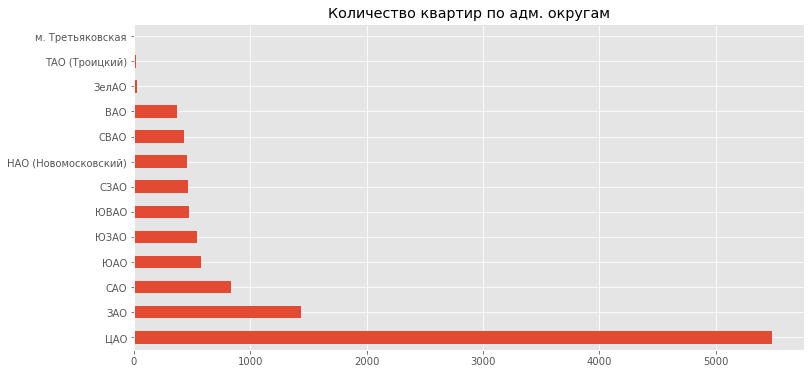

In [224]:
df['admin_okrug'].value_counts().plot(kind='barh', figsize = (12, 6))
plt.title('Количество квартир по адм. округам')
plt.show()

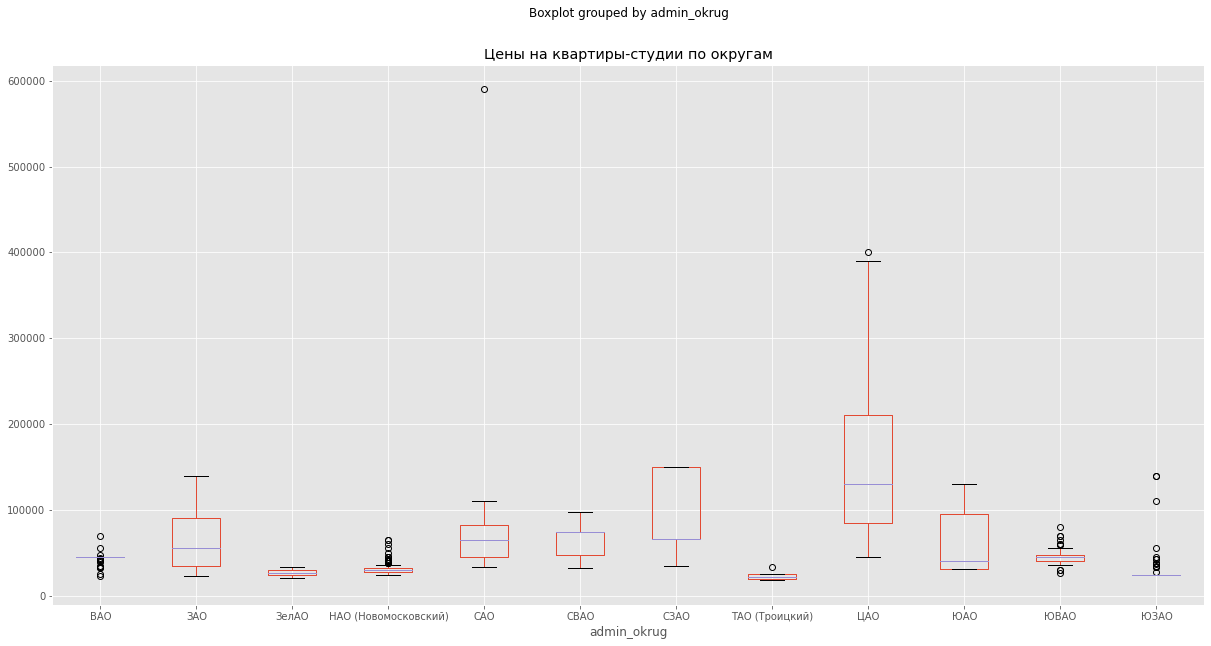

In [225]:
df[ df['rooms']==9 ].boxplot(by='admin_okrug', column = 'price',
          figsize = (20, 10))
plt.title('Цены на квартиры-студии по округам')
plt.show()

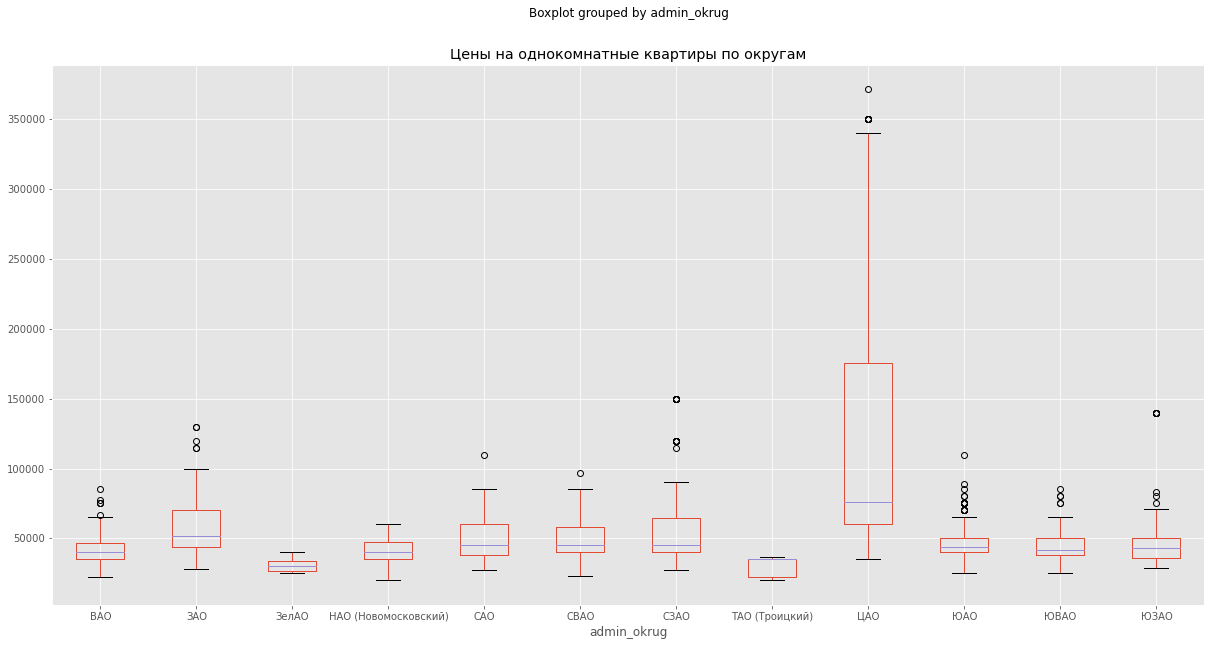

In [226]:
df[ df['rooms']==1 ].boxplot(by='admin_okrug', column = 'price',
          figsize = (20, 10))
plt.title('Цены на однокомнатные квартиры по округам')
plt.show()

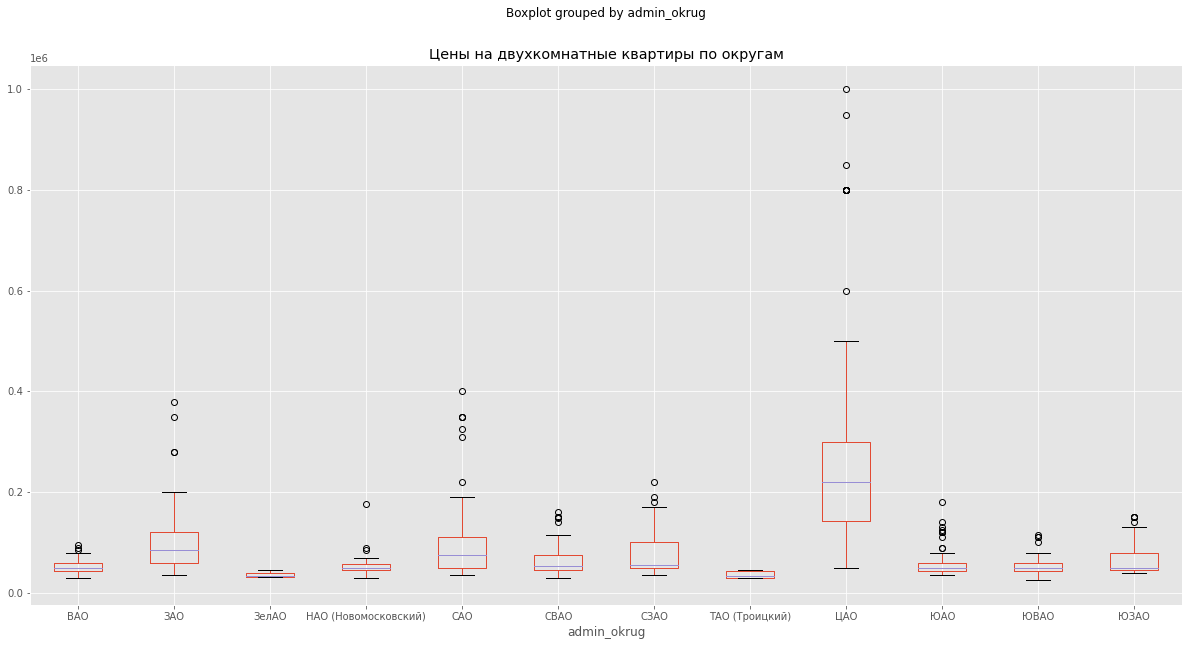

In [227]:
df[ df['rooms']==2 ].boxplot(by='admin_okrug', column = 'price',
          figsize = (20, 10))
plt.title('Цены на двухкомнатные квартиры по округам')
plt.show()

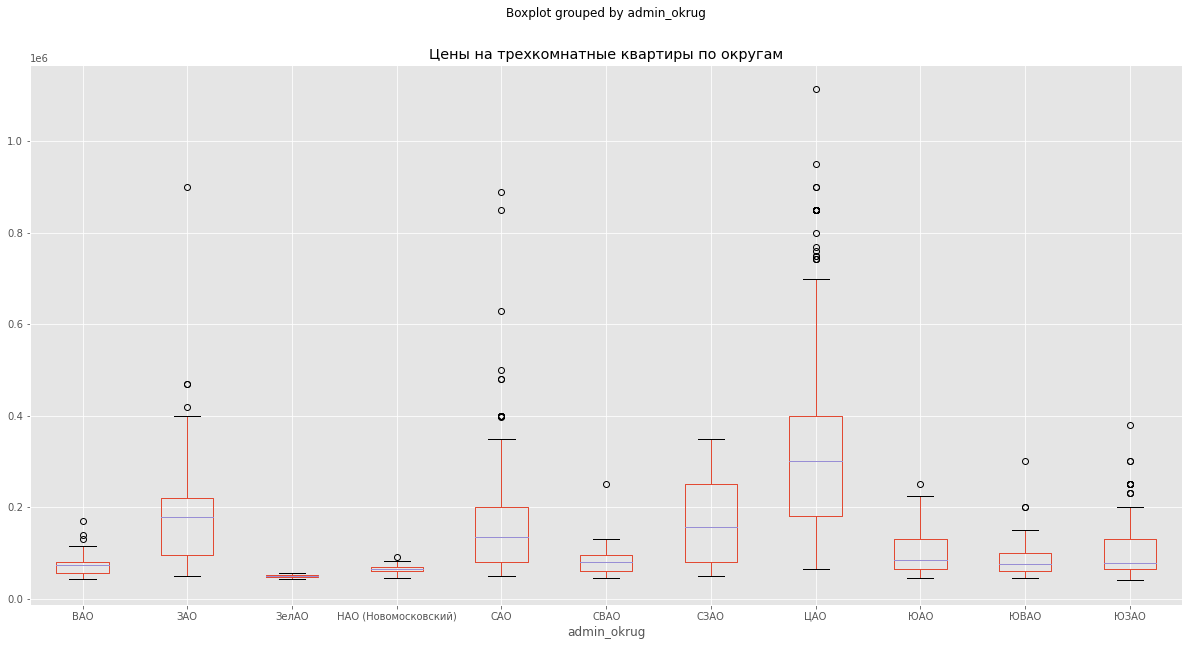

In [228]:
df[ df['rooms']==3 ].boxplot(by='admin_okrug', column = 'price',
          figsize = (20, 10))
plt.title('Цены на трехкомнатные квартиры по округам')
plt.show()

## Посмотрим, как влияет общая площадь квартиры на стоимость

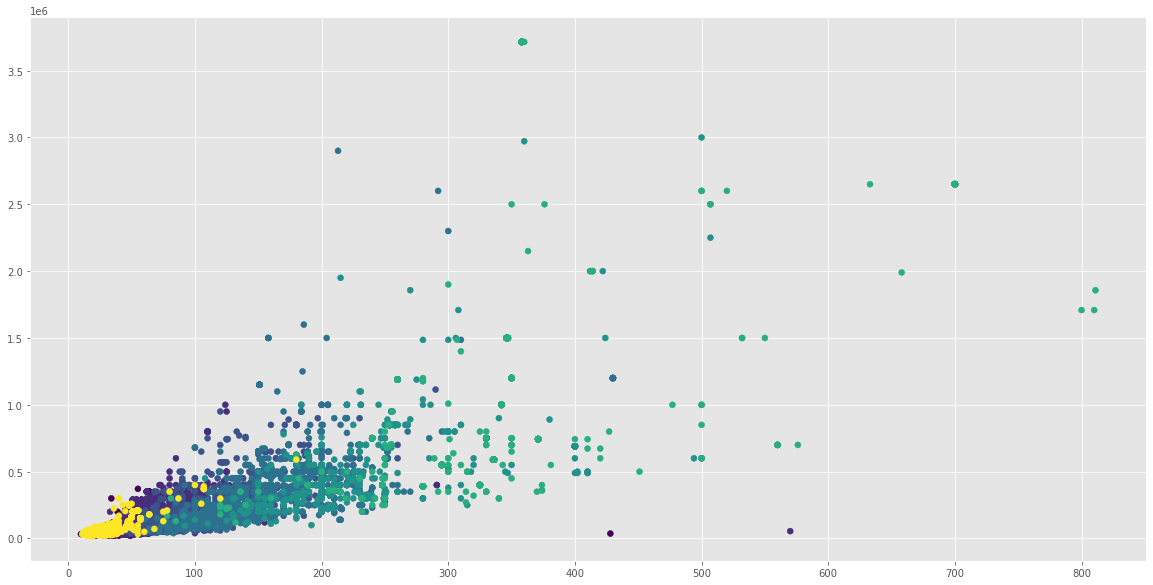

In [229]:
plt.figure(figsize = (20, 10))
plt.scatter(df.total_sq, df.price, c=df.rooms)
plt.show()

## Как зависит стоимость от разрешения на животных и детей

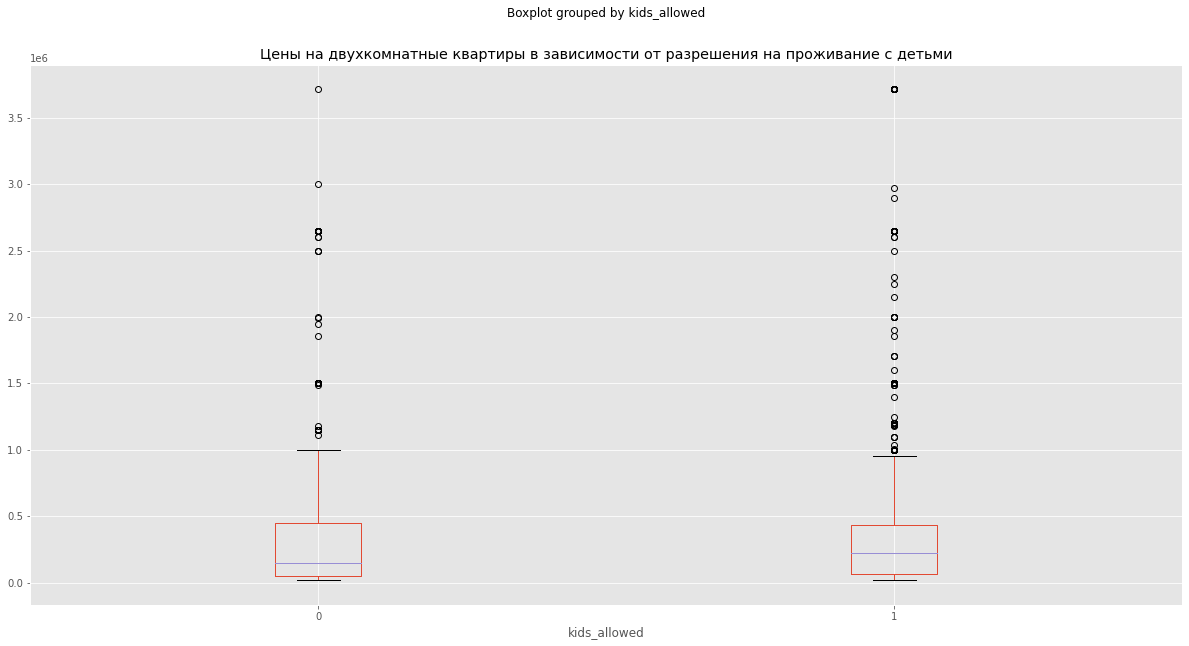

In [230]:
df.boxplot(by='kids_allowed', column = 'price',
          figsize = (20, 10))
plt.title('Цены на двухкомнатные квартиры в зависимости от разрешения на проживание с детьми')
plt.show()

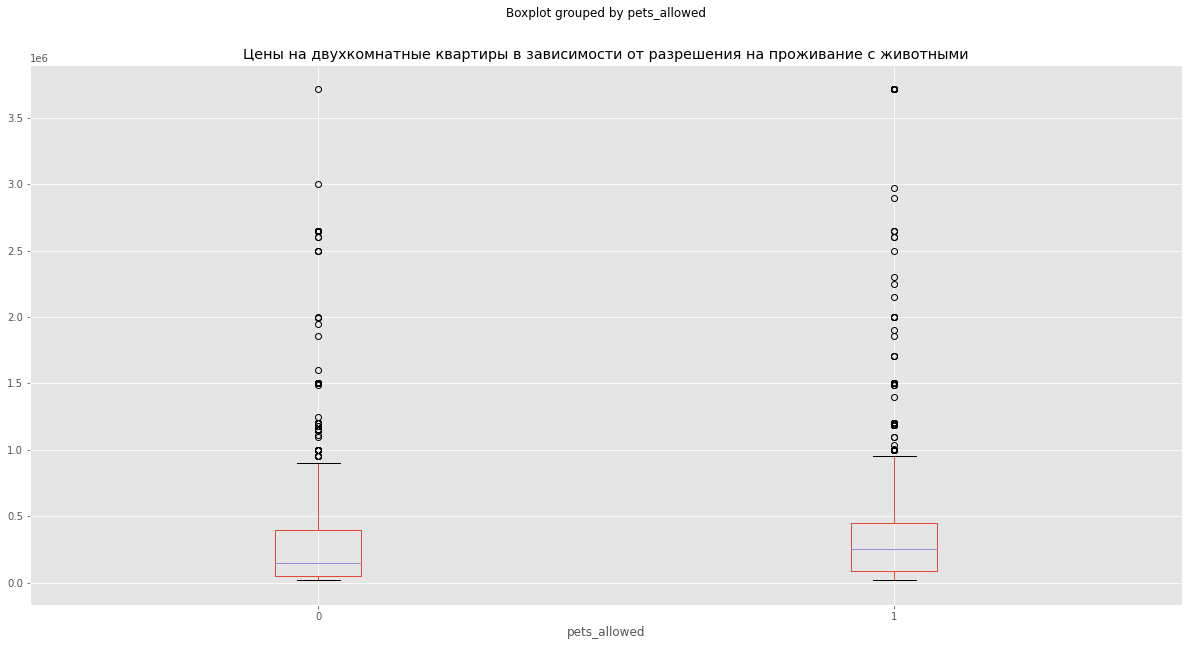

In [231]:
df.boxplot(by='pets_allowed', column = 'price',
          figsize = (20, 10))
plt.title('Цены на двухкомнатные квартиры в зависимости от разрешения на проживание с животными')
plt.show()

**Можно заметить, что разрешение на проживание животных имеет более сильное влияние на стоимость аренды, чем проживание с детьми**

### Посмотрим на разные параметры квартиры

In [232]:
utils = ['fridge', 'washing', 'furniture', 'kitchen',
       'dishwasher', 'cond', 'internet', 'shower', 'bath', 'tv']

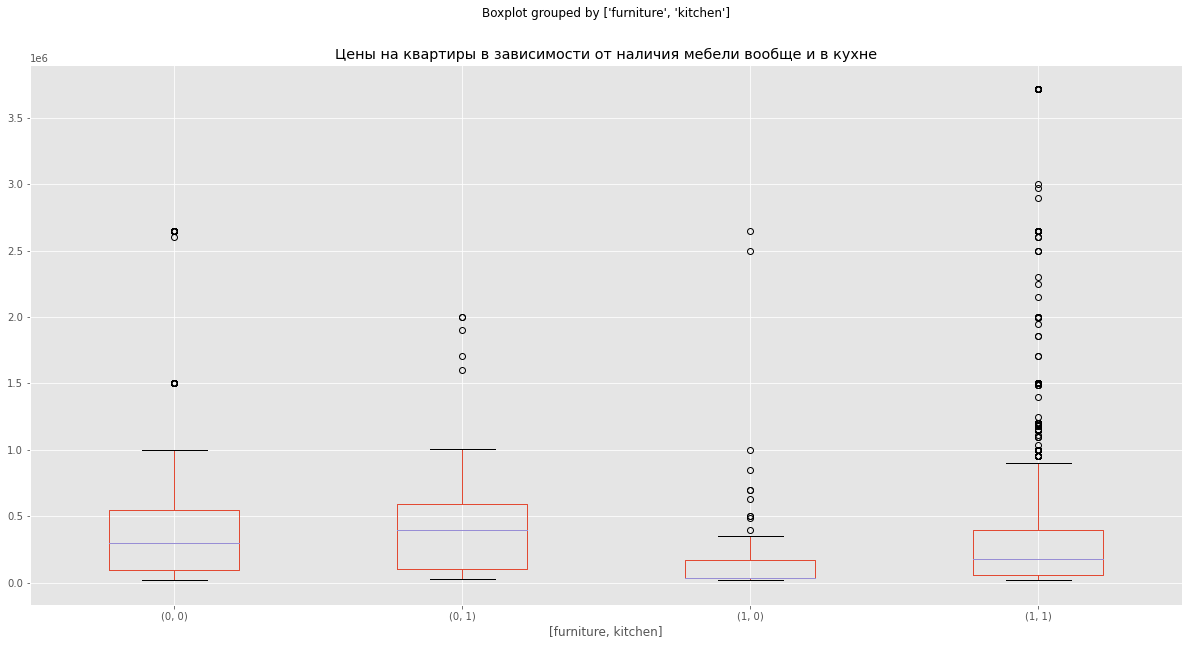

In [233]:
df.boxplot(by=['furniture', 'kitchen'], column = 'price',
          figsize = (20, 10))
plt.title('Цены на квартиры в зависимости от наличия мебели вообще и в кухне')
plt.show()

**Видно, что распределение стоимости аренды квартир БЕЗ обставленной мебели и кухни странно отличается от С. Возможно это связано с тем, что квартиры по умолчанию сдаются с какой-то мебелью и авторы объявлений вообще не указывают ее наличие**

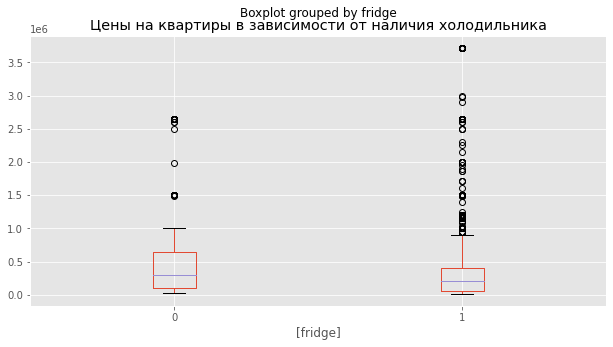

In [234]:
df.boxplot(by=['fridge'], column = 'price',
          figsize = (10, 5))
plt.title('Цены на квартиры в зависимости от наличия холодильника')
plt.show()

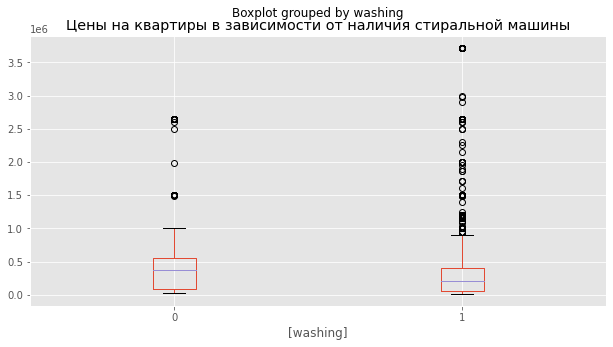

In [235]:
df.boxplot(by=['washing'], column = 'price',
          figsize = (10, 5))
plt.title('Цены на квартиры в зависимости от наличия стиральной машины')
plt.show()

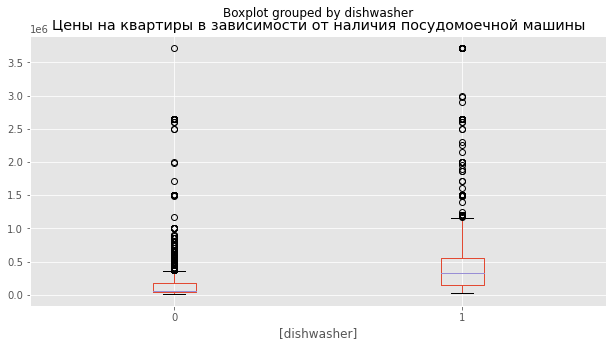

In [236]:
df.boxplot(by=['dishwasher'], column = 'price',
          figsize = (10, 5))
plt.title('Цены на квартиры в зависимости от наличия посудомоечной машины')
plt.show()

**Вероятно, холодильник и стиральная машина подразумеваются в квартирах по умолчанию. Наличие же посудомойки может сказываться в большую сторону на величине арендной платы**

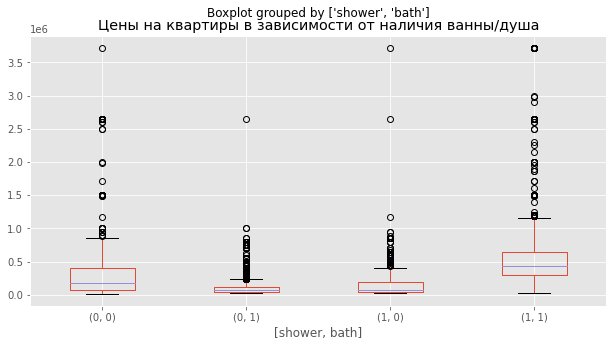

In [237]:
df.boxplot(by=['shower', 'bath'], column = 'price',
          figsize = (10, 5))
plt.title('Цены на квартиры в зависимости от наличия ванны/душа')
plt.show()

**Вероятно наличие и ванны, и душа положительно влияет на величину арендной платы. Квартиры без указания ванны и душа, верятно подразумеваются обычными.**

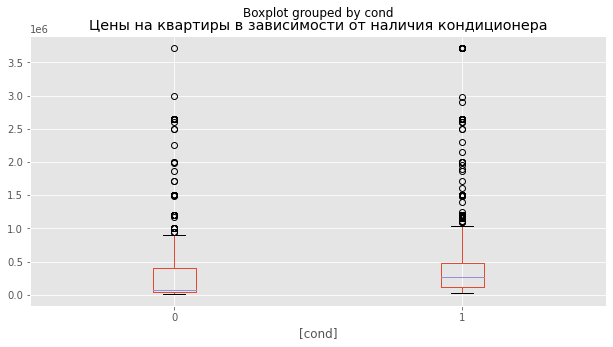

In [238]:
df.boxplot(by=['cond'], column = 'price',
          figsize = (10, 5))
plt.title('Цены на квартиры в зависимости от наличия кондиционера')
plt.show()

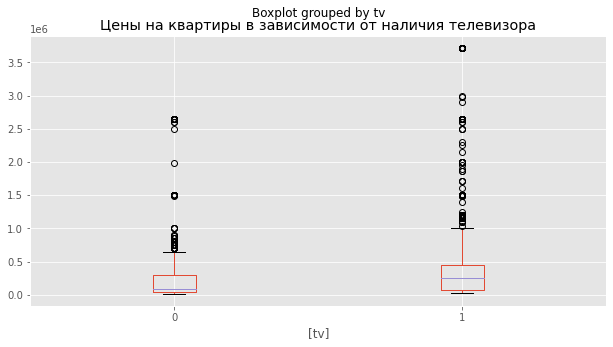

In [239]:
df.boxplot(by=['tv'], column = 'price',
          figsize = (10, 5))
plt.title('Цены на квартиры в зависимости от наличия телевизора')
plt.show()

## Посмотрим, есть ли зависимость от расстояния до метро

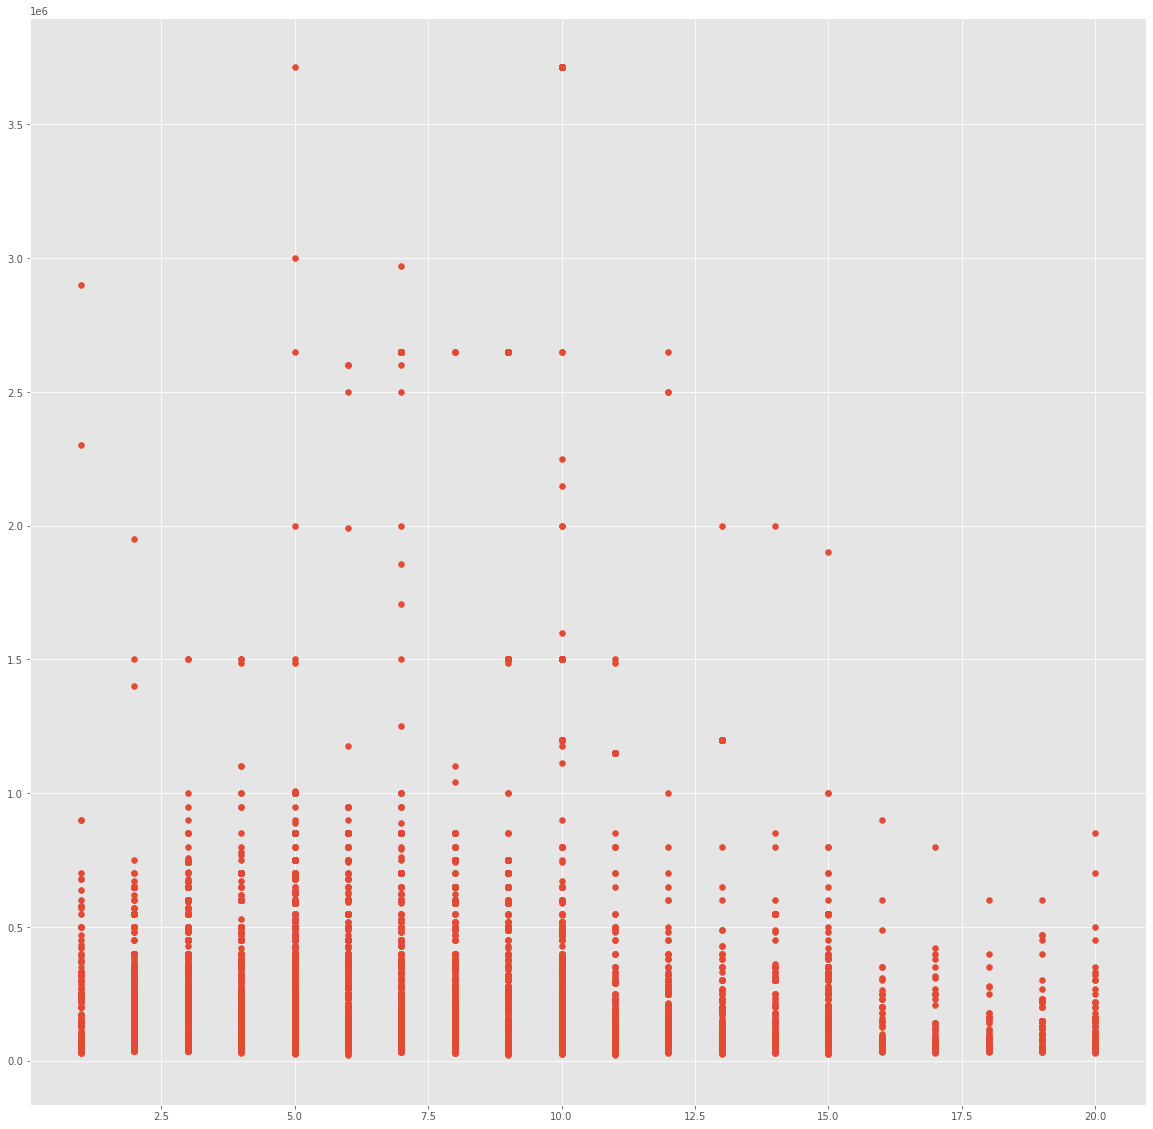

In [241]:
plt.figure(figsize = (20, 20))
df_walking_to_subway = df[df['dist_to_subway, means']=='пешком']
plt.scatter(df_walking_to_subway['dist_to_subway, min'], df_walking_to_subway.price)
plt.show()

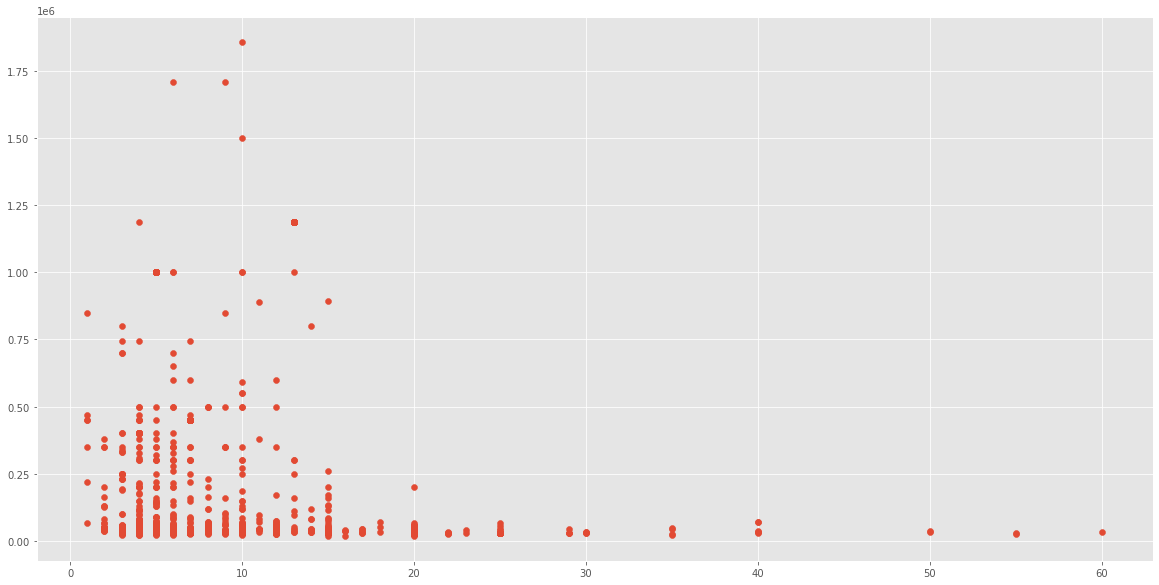

In [242]:
plt.figure(figsize = (20, 10))
df_walking_to_subway = df[df['dist_to_subway, means']=='на транспорте']
plt.scatter(df_walking_to_subway['dist_to_subway, min'], df_walking_to_subway.price)
plt.show()

**По графикам видно, что с увеличением времени до метро стоимость квартир понижается. При этом кажется, что на одном уровне будут находиться квартиры с расстоянием до метро до 10 мин пешком или 10-15 мин на транспорте. После этих значений следует падение (возможно связано с психолически комфортными значениями времени). При этом границы стоимостей квартир в пешей доступности до метро вероятно существенно выше.**

## Есть ли зависимость от этажа и высотности дома?

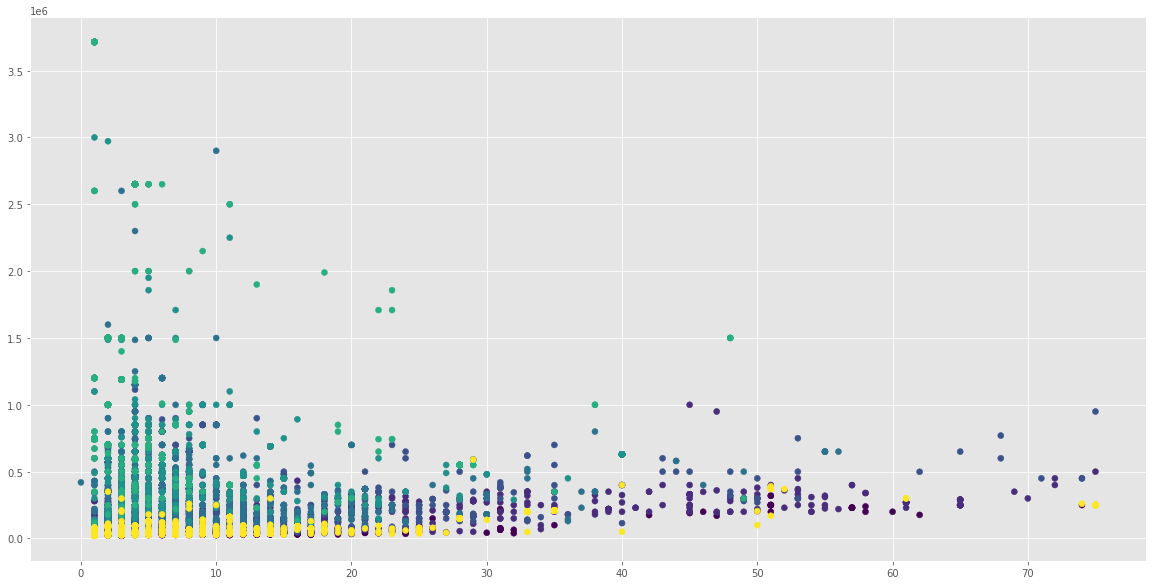

In [243]:
plt.figure(figsize = (20, 10))
plt.scatter(df.floor, df.price, c=df.rooms)
plt.show()

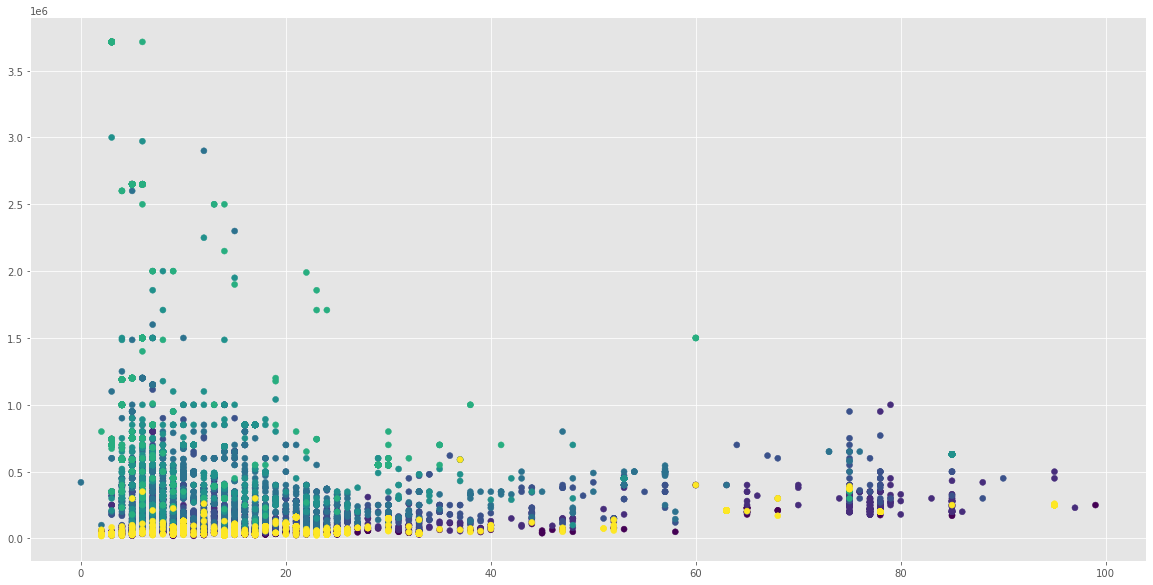

In [244]:
plt.figure(figsize = (20, 10))
plt.scatter(df.max_floor, df.price, c=df.rooms)
plt.show()

**Из графиков видно, что нижние этажи (1-2) соответсвуют самым низким арендным ставкам. При этом и здания до 5 этажей скорее всего тоже имеют влияние на арендную ставку (возможно для дальнейшего анализа потребуются также сведения о включении дома в программу реновации). В высотных домах пропадают дешевые однокомнатные квартиры и студии, кроме того в высотных зданиях (более 60 этажей) практически нет объектов с стоимостью аренды ниже 200тр.**

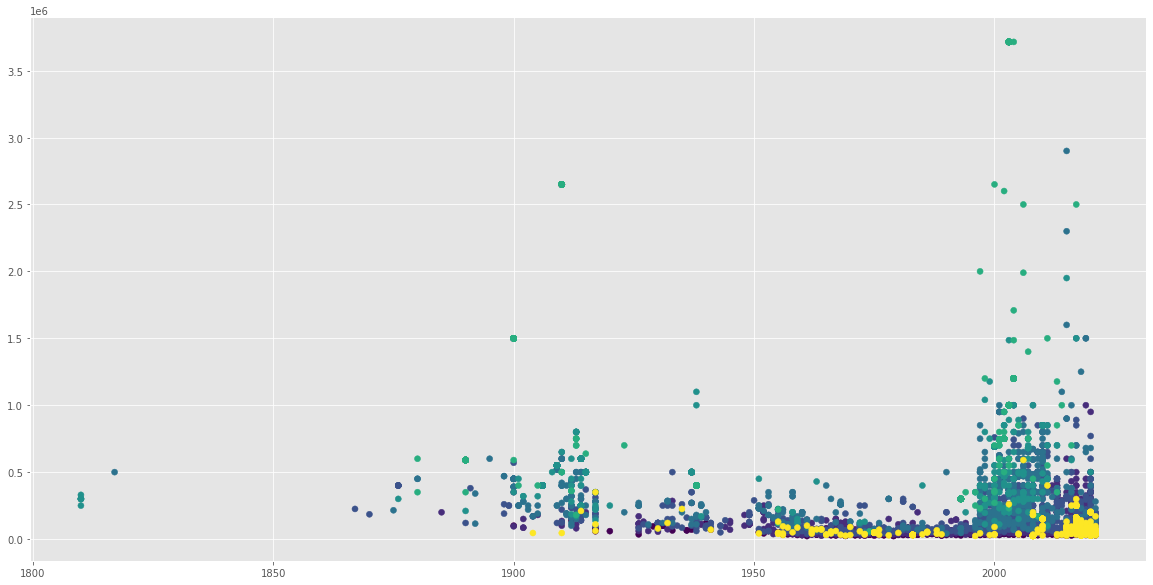

In [245]:
plt.figure(figsize = (20, 10))
df_by = df[df.built_year >0]
plt.scatter(df_by.built_year, df_by.price, c=df_by.rooms)
plt.show()

**В датасете достаточно много домов без указания возраста. Возможно стоит в дальнейшем заполнить пропуски средними значениями по району. Также видно, что наибольший разброс по ценам аренды - среди домов, построенных в последние 20 лет.**